In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.linalg
# import scipy.signal
import scipy.fft as spfft
# import scipy.ndimage as spimg
from scipy.spatial.transform import Rotation as R
# import cvxpy as cvx
from importlib import reload

import util, plot
from util import *

$$
(a+bi)(a-bi) = a^2 - i^2b^2 = a^2 + b^2  \quad
\|\mathbf{x}\|_2^2 = a^2 + b^2
$$

$$
\mathbf{x} := \begin{bmatrix}a\\b\end{bmatrix}  =a + bi
$$

In [4]:
# TODO
# is direction (polsign) applied before/after superposition summation?
#    i.e. should \delta have a sign

# normalizing constant for area
#   factor before exp(): `cosfact=Gz./Gdistances`

# add original source (far away)

# check sampledichtheid

In [5]:
reload(plot)
reload(util)
from util import *

In [53]:
x = np.zeros(shape=(N,2)) # amplitude, phase
y = np.empty((N,2))  # amplitude, phase
z = np.empty((N,2))  # amplitude, phase
N_sqrt = compute_N_sqrt()

# Discrete space, near-far field
## Point source

In [104]:
y.shape

(6400, 2)

Warning, phase terms of third order and higher must be negligible
Warning, F is near 1, for F = 10.00
near True


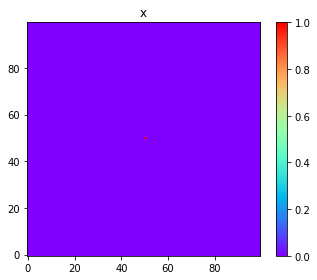

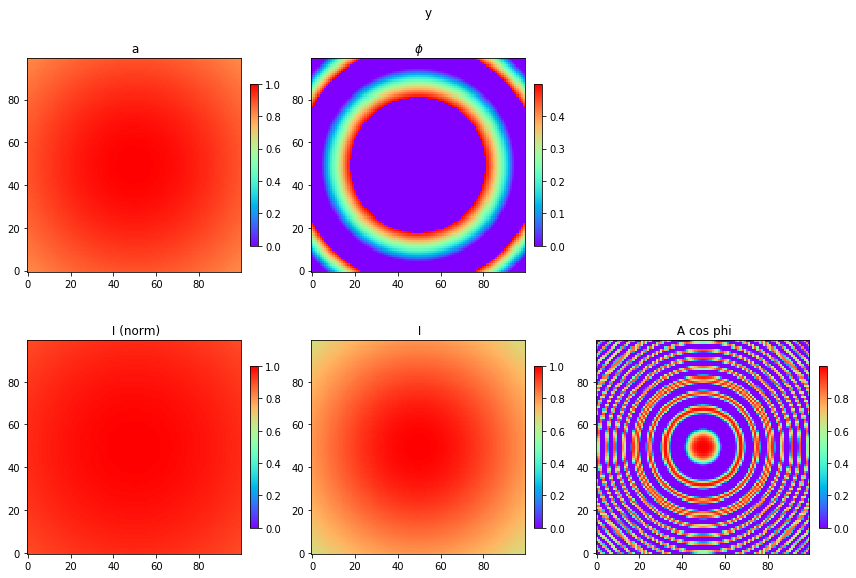

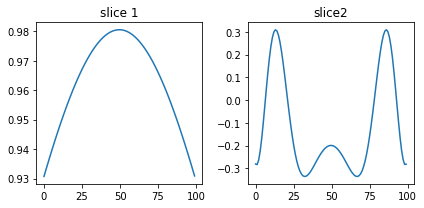

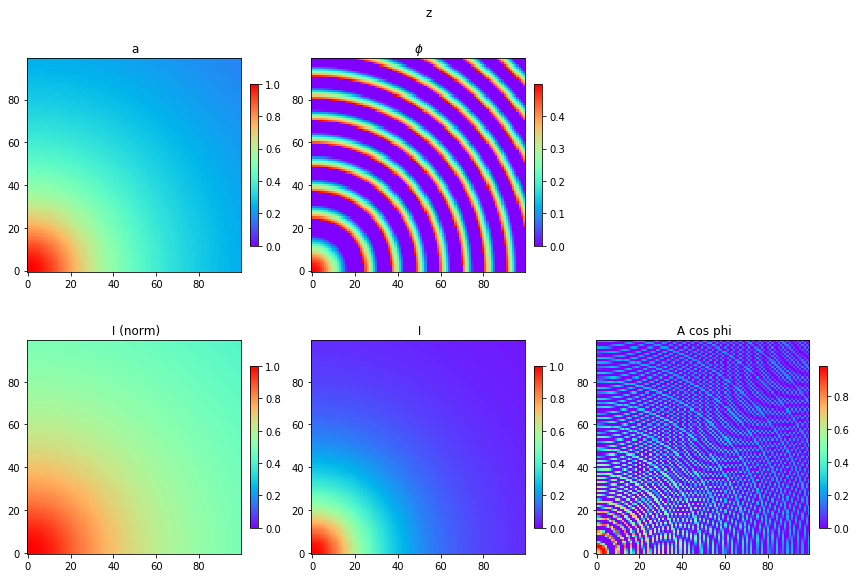

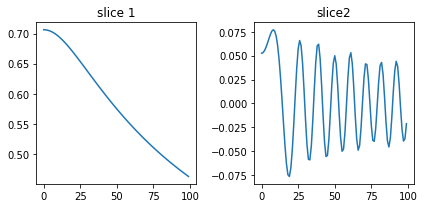

In [39]:
# reload(util)
# reload(plot)
# from util import *
x_width = 1
width = 1e1 * LAMBDA
d = 1e1
w = sample_grid(N, x_width * LAMBDA)
v = sample_grid(N, width, d * LAMBDA)
u = sample_grid(N, width, d * LAMBDA / 4, center=0)
print('near', near(width, d * LAMBDA))
    
# center pixel
# x[N//2 + N_sqrt//2, 0] = 1
x[:] = 0
x[N//2 + N_sqrt//2, 0] = 1

map_sum_kernel(x,y,w,v)
map_sum_kernel(x,z,w,u)
# for m in range(N):
#     y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=1)
#     z[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, u[m])), distance=1)
    
normalize_amplitude(y)
normalize_amplitude(z)

plot.matrix(vec_to_im(x[:, 0]), 'x')
plot.matrix_multiple(y, 'y')
plot.matrix_multiple(z, 'z')
# plot.matrix_multiple(v2[:,:2], 'y')

# Vlakke golf
Far away point source

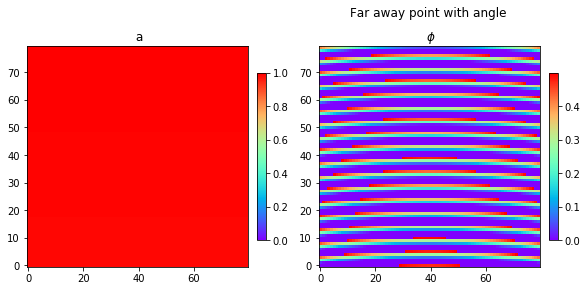

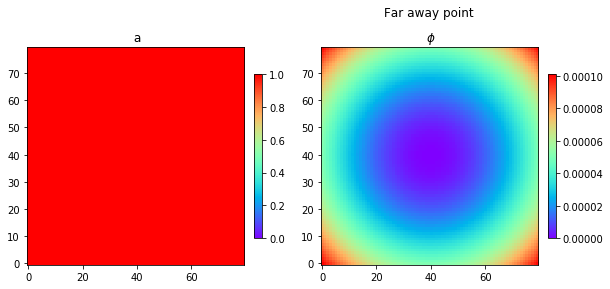

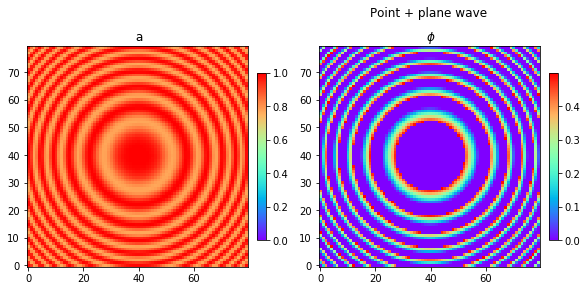

In [58]:
# reload(util)
# reload(plot)
# from util import *
x_width = 1e2
width = 2e2 * LAMBDA
d1 = 0
d2 = 1e1 * width
w = sample_grid(N, x_width, -1e4 * LAMBDA)
v = sample_grid(N, width, d1, center=1)

x[:] = 0
x[N//2 + N_sqrt//2,0] = 1
# offset x dim
w[:,0] += 1e4 * LAMBDA

map_sum_kernel(x,y,w,v, direction=-1)
# for m in range(N):
#     y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
normalize_amplitude(y)
plot.matrix_multiple(y, 'Far away point with angle', m=1)

w = sample_grid(N, x_width, -1e8 * LAMBDA)
map_sum_kernel(x,y,w,v, distance=-1)
# for m in range(N):
#     y[m, :] = from_polar(np.sum(f(x[:,0], x[:,1], w, v[m])), distance=-1)
normalize_amplitude(y)
plot.matrix_multiple(y, 'Far away point', m=1)

w2 = np.array([0,0,-1e8])
w = sample_grid(N, x_width, -1e3 * LAMBDA)
# for m in range(N):
#     c = f(N, 0, w2, v[m].reshape((1,-1)))
#     y[m, :] = from_polar(c)
# normalize_amplitude(y)
# plot.matrix_multiple(y, 'Point only', m=1)

# w2 = np.array([0,0,-1e8])
for m in range(N):
    # point
    c = f(2*N, 0, w2, v[m].reshape((1,-1)))
    # plane
#     c += np.sum(f(x[:,0], x[:,1], w, v[m]))
    c += sum_kernel(x,w,v[m])
    y[m, :] = from_polar(c)
normalize_amplitude(y)
plot.matrix_multiple(y, 'Point + plane wave', m=1)

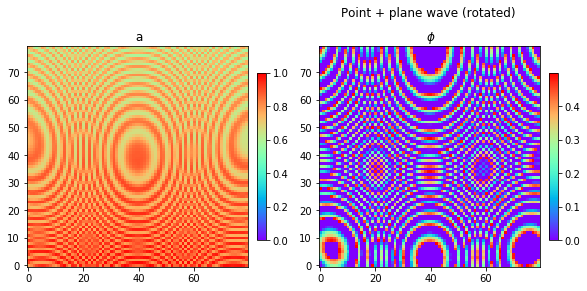

In [110]:
v2 = sample_grid(N, 2*width, d1, center=1)
v2 = R.from_euler('Y', -45, degrees=True).apply(v2)

for m in range(N):
    # point
    c = f(2*N, 0, w2, v2[m].reshape((1,-1)))
    # plane
    c += sum_kernel(x, w, v2[m])
    y[m, :] = from_polar(c)
    
normalize_amplitude(y)
plot.matrix_multiple(y, 'Point + plane wave (rotated)', m=1)

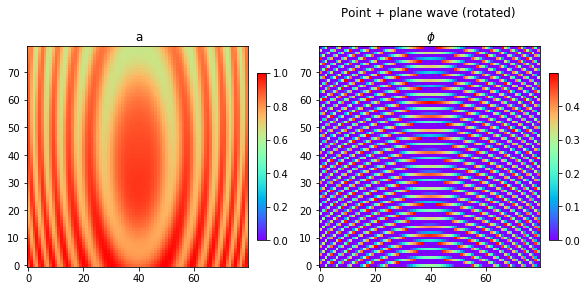

In [116]:
v2 = sample_grid(N, 1 * width, d1, center=1)
v2 = R.from_euler('Y', -70, degrees=True).apply(v2)

for m in range(N):
    # point
    c = f(2*N, 0, w2, v2[m].reshape((1,-1)))
    # plane
    c += sum_kernel(x, w, v2[m])
    y[m, :] = from_polar(c)

normalize_amplitude(y)
plot.matrix_multiple(y, 'Point + plane wave (rotated)', m=1)

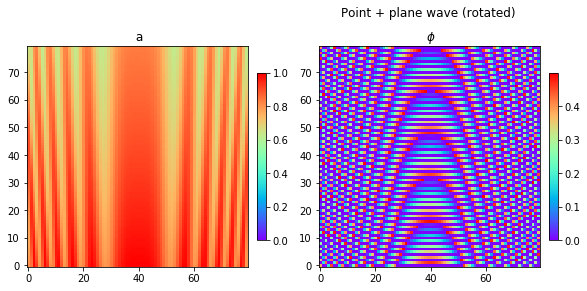

In [114]:
v2 = sample_grid(N, 1 * width, d1, center=1)
v2 = R.from_euler('Y', -90, degrees=True).apply(v2)

for m in range(N):
    # point
    c = f(2*N, 0, w2, v2[m].reshape((1,-1)))
    # plane
    c += sum_kernel(x, w, v2[m])
    y[m, :] = from_polar(c)

normalize_amplitude(y)
plot.matrix_multiple(y, 'Point + plane wave (rotated)', m=1)

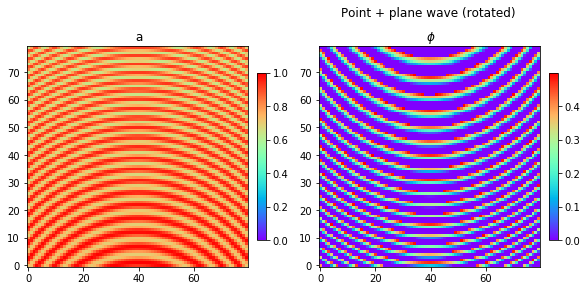

In [119]:
v2 = sample_grid(N, 1 * width, 1e3 * LAMBDA, center=1)
v2 = R.from_euler('Y', -90, degrees=True).apply(v2)

for m in range(N):
    # point
    c = f(2*N, 0, w2, v2[m].reshape((1,-1)))
    # plane
    c += sum_kernel(x, w, v2[m])
    y[m, :] = from_polar(c)

normalize_amplitude(y)
plot.matrix_multiple(y, 'Point + plane wave (rotated)', m=1)

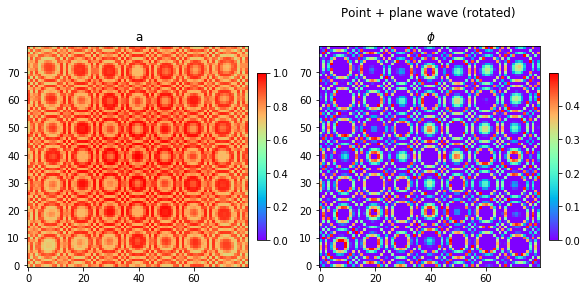

In [75]:
v2 = sample_grid(N, 4*width, d1, center=1)
for m in range(N):
    # point
    c = f(2*N, 0, w2, v2[m].reshape((1,-1)))
    # plane
    c += sum_kernel(x, w, v2[m])
    y[m, :] = from_polar(c)
    
normalize_amplitude(y)
plot.matrix_multiple(y, 'Point + plane wave', m=1)

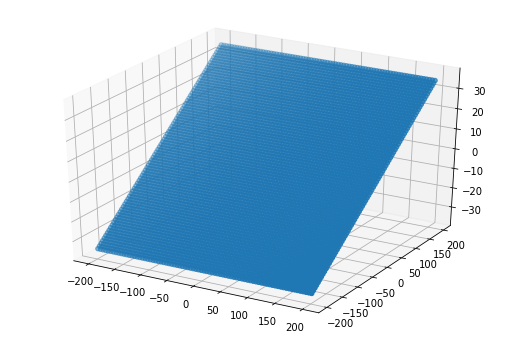

In [107]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# %matplotlib notebook

v2 = sample_grid(N, 2*width, d1, center=1)
A = R.from_euler('X', 10, degrees=True)
v2 = A.apply(v2).round(2)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(v2[:,0], v2[:,2], v2[:,1])
ax.scatter(v2[:,0], v2[:,1], v2[:,2])

## Single slit
(inf) many point sources

Warning, phase terms of third order and higher must be negligible
near True


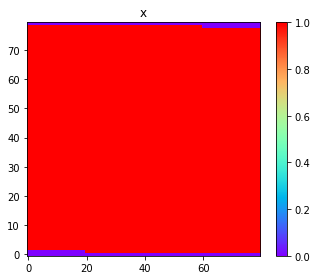

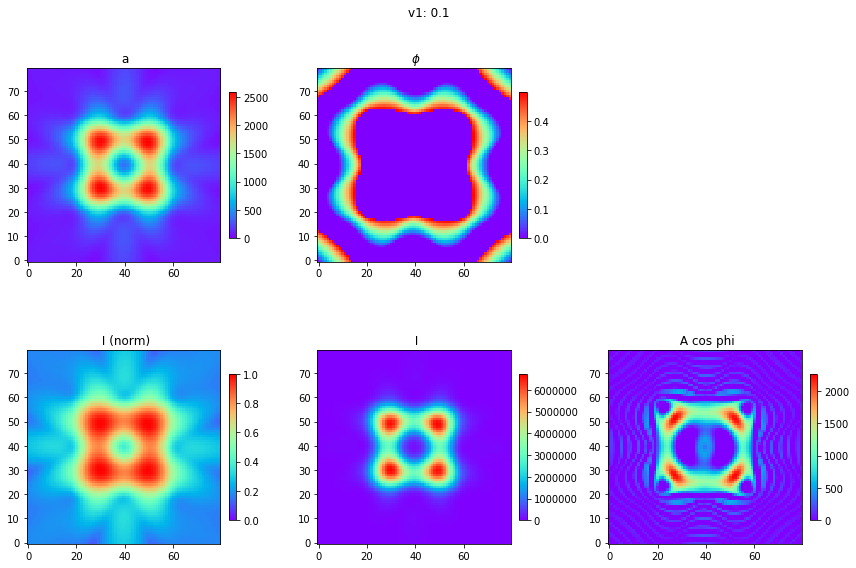

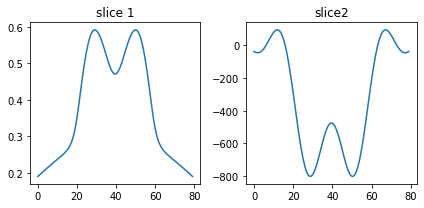

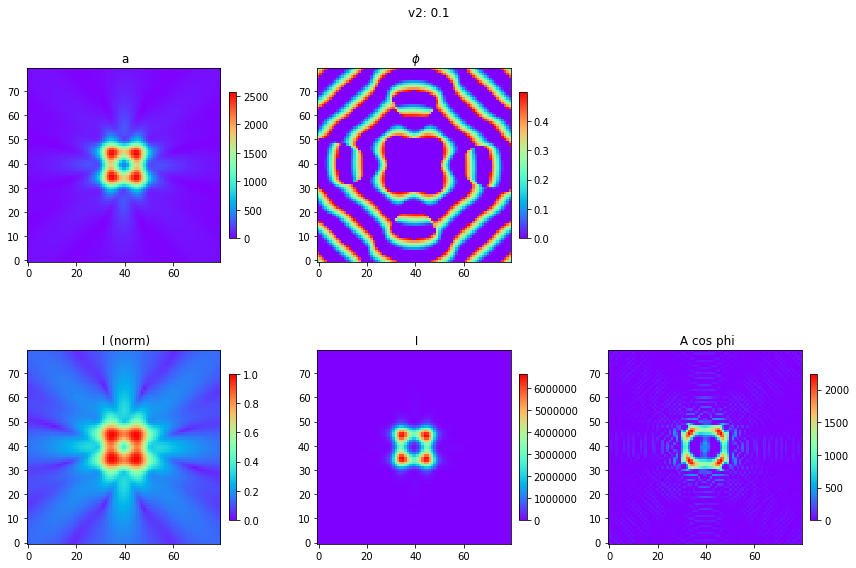

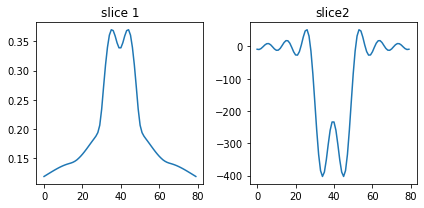

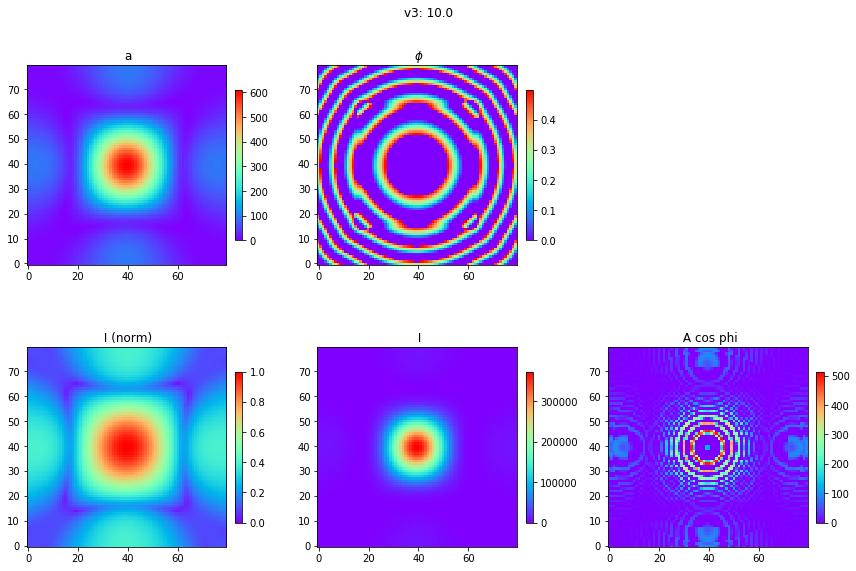

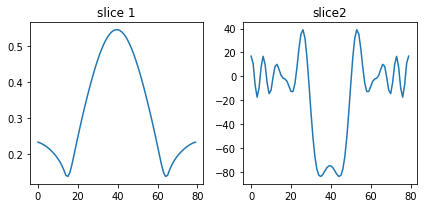

In [28]:
reload(util)
reload(plot)
x_width = 2
width = 4e0 * LAMBDA
d1 = 1e-1
d2 = 1e-1
d3 = 1e1
w = sample_grid(N, x_width * LAMBDA)
v1 = sample_grid(N, width, d1 * LAMBDA)
v2 = sample_grid(N, width*2, d2 * LAMBDA)
v3 = sample_grid(N, width*5, d3 * LAMBDA)
print('near', near(width, d1 * LAMBDA))
# print('near', near(width*2, d2 * LAMBDA))
# print('near', near(width/2, d3 * LAMBDA))

x[:] = 0
x[100:-100, 0] = 1

map_sum_kernel(x,v1[:,:2],w,v1, distance=1)
map_sum_kernel(x,v2[:,:2],w,v2, distance=1)
map_sum_kernel(x,v3[:,:2],w,v3, distance=1)

# for m in range(N):
#     v1[m, :2] = from_polar(np.sum(f(x[:,0], x[:,1], w, v1[m])))
#     v2[m, :2] = from_polar(np.sum(f(x[:,0], x[:,1], w, v2[m])))
#     v3[m, :2] = from_polar(np.sum(f(x[:,0], x[:,1], w, v3[m])))

# normalize_amplitude(y)

plot.matrix(vec_to_im(x[:, 0]), 'x')
plot.matrix_multiple(v1, 'v1: ' + str(d1))
plot.matrix_multiple(v2, 'v2: ' + str(d2))
plot.matrix_multiple(v3, 'v3: ' + str(d3))

## Double slit

Warning, phase terms of third order and higher must be negligible
near True
Warning, phase terms of third order and higher must be negligible
Warning, F is near 1, for F = 10.00
near True


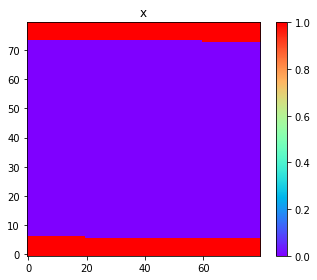

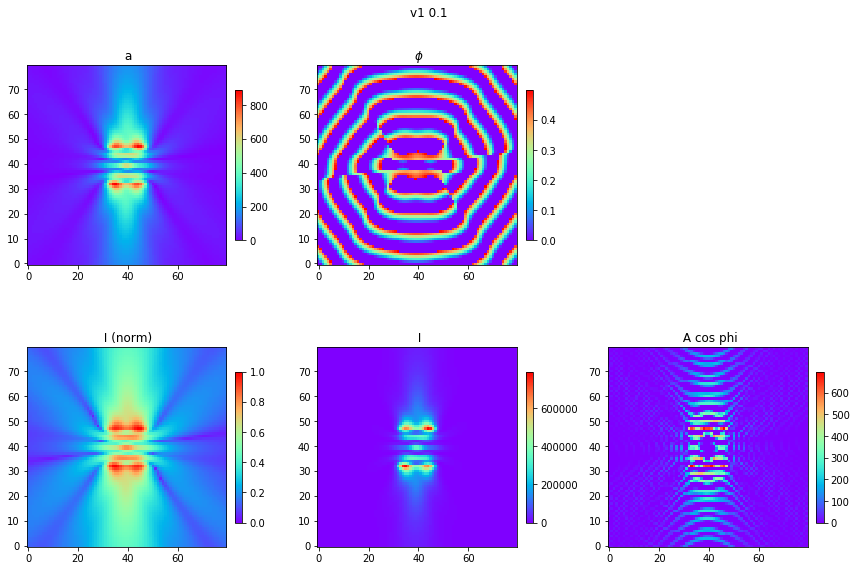

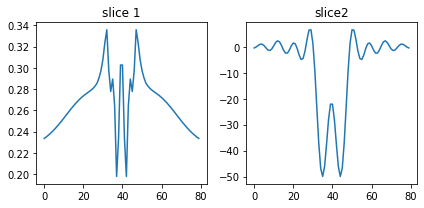

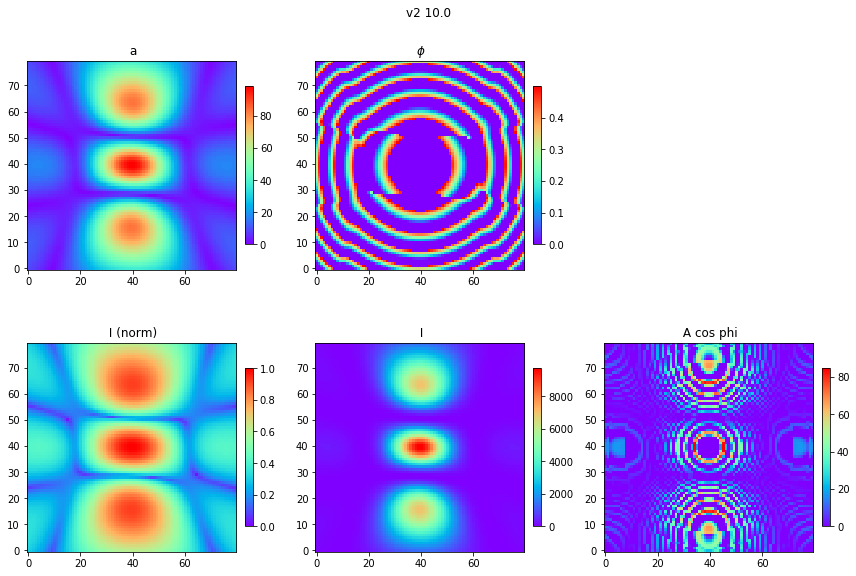

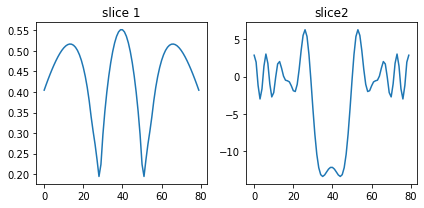

In [29]:
x_width = 2
width = 1e1 * LAMBDA
d1 = 1e-1
d2 = 1e1
w = sample_grid(N, x_width * LAMBDA)
v1 = sample_grid(N, width, d1 * LAMBDA)
v2 = sample_grid(N, 2*width, d2 * LAMBDA)
print('near', near(width, d1 * LAMBDA))
print('near', near(width, d2 * LAMBDA))

x[:] = 0
x[:500, 0] = 1
x[-500:, 0] = 1


map_sum_kernel(x,v1[:,:2],w,v1, distance=1)
map_sum_kernel(x,v2[:,:2],w,v2, distance=1)
# for m in range(N):
#     v1[m, :2] = from_polar(np.sum(f(x[:,0], x[:,1], w, v1[m])), distance=1)
#     v2[m, :2] = from_polar(np.sum(f(x[:,0], x[:,1], w, v2[m])), distance=1)

plot.matrix(vec_to_im(x[:, 0]), 'x')
plot.matrix_multiple(v1, 'v1 ' + str(d1))
plot.matrix_multiple(v2, 'v2 ' + str(d2))